In [1]:
import re
import os
import tweepy 
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

nltk.download('stopwords')
# Global Parameters
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lihangqian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
API_key = "BMKPfpLYmWL4FlQ3xBYwHyR3C"   
API_key_secret = "bw78ZRgeRGUF9PW8oq5VgdyaxCXKqpLj0TDrEf4Spb9knByPMt"   
access_token = "1227382295839072256-fikcUBGnAkBzS6JL30izpm7TEibIbj"   
access_token_secret = "4OldcYBWQSa3Cc6tGmjUhxGREuMM7Myv6XOM2enrg8Zsh" 
auth = tweepy.OAuthHandler(API_key, API_key_secret)    
auth.set_access_token(access_token, access_token_secret)   
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

### data collection：

As for different cities and areas, we are going to choose different cities and areas: including the cities and rural areas.

In [4]:
# hashtag about vaccine: 

# vaccine,covid19vaccine,vaccinated,getvaccinated,covidvaccine,vaccinated,astrazeneca,oxfordastrazeneca,pfizer,pfizerbiontech,pfizervaccine,moderna,modernavaccine,sputnik,sputnikvaccinated,janssen,johnsonandjohnson

In [5]:
# hashtag about astrazeneca vaccine: 
text_query_astrazeneca='#astrazeneca OR #oxfordastrazeneca OR #astrazenecavaccine OR #astrazenecacovid OR #astrazenecavaccinated'

In [6]:
# hashtag about pfizer vaccine: 
text_query_pfizer='#pfizer OR #pfizervaccine OR #PfizerGang OR #Pfizercovid OR pfizervaccinated OR #pfizerbiontech'

In [7]:
# hashtag about Janssen vaccine: 
text_query_janssen='#janssen OR #janssenvaccine OR #janssencovid OR #johnsonandjohnson OR #janssenvaccinated OR #JohnsonAndJohnsonCOVIDVaccine'

In [8]:
# hashtag about moderna vaccine: 
text_query_moderna='#moderna OR #modernavaccine OR #modernacovid OR #johnsonandjohnson OR #janssenvaccinated'

In [9]:
# hashtag about sputnik vaccine: 
text_query_sputnik='#sputnik OR #sputnikvaccine OR #sputnikcovid OR ##SputnikV OR #sputnikaccinated'

In [10]:
text_query = '#vaccine OR #vaccination OR #vaccineforall OR #vaccinated OR #covidvaccine OR #covid19vaccine OR #getvaccinated OR #astrazeneca OR #oxfordastrazeneca OR #pfizer OR #pfizerbiontech OR #pfizervaccine OR #moderna OR #modernavaccine OR #sputnik OR #sputnikvaccinated OR #janssen OR #johnsonandjohnson'
max_tweets= 10000

In [11]:
def get_twitter_by_location(text_query,max_tweets,coordinates):
    
    # within a 50-mile radius of Las Vegas, NV (Lat 36.169786, Long -115.139858) that have the keyword Coronavirus.
    #coordinates = '36.169786,-115.139858,100mi'
    # Creation of query method using parameters
    tweets = tweepy.Cursor(api.search, tweet_mode='extended', q = text_query, geocode = coordinates, count = 100).items(max_tweets)
#   tweets = tweepy.Cursor(api.search, q = text_query, geocode = coordinates, count = 100).items(max_tweets)
    # Pulling information from tweets iterable object
    # Add or remove tweet information you want in the below list comprehension
    tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.name, tweet.user.screen_name, tweet.user.id_str, tweet.user.location, tweet.user.url, tweet.user.description, tweet.user.verified, tweet.user.followers_count, tweet.user.friends_count, tweet.user.favourites_count, tweet.user.statuses_count, tweet.user.listed_count, tweet.user.created_at, tweet.user.profile_image_url_https, tweet.user.default_profile, tweet.user.default_profile_image, tweet.lang] for tweet in tweets]
    
    # Creation of dataframe from tweets_list
    # Did not include column names to simplify code
    tweets_df = pd.DataFrame(tweets_list)
    return tweets_df

#### Las Vegas, NV (Lat 36.169786, Long -115.139858)

In [12]:
# tweets_df_LasVegas=get_twitter_by_location(text_query,max_tweets,'36.169786,-115.139858,100mi')
# tweets_df_LasVegas.to_csv('twitter0517/tweets_df_LasVegas.csv',index=False,header=False)

In [13]:
# tweets_df_LasVegas.head()

#### Centerville Township (Lat 38.22183, Long -95.01414) 
which is the poorest town in the USA

In [14]:
# tweets_df_CentervilleTownship=get_twitter_by_location(text_query,max_tweets,'38.22183,-95.01414,100mi')
# tweets_df_CentervilleTownship.to_csv('twitter0427/tweets_df_CentervilleTownship.csv',index=False,header=False)

In [15]:
# tweets_df_CentervilleTownship.head()

#### Los Angeles (Lat 34.04679, Long -118.25081)
cases daily avg: 251, per 100k: 3, deaths daily avg.: 13.3, per 100k: 0.13, vaccinated: 39%

In [16]:
# tweets_df_LosAngeles=get_twitter_by_location(text_query,max_tweets,'34.04679,-118.25081,100mi')
# tweets_df_LosAngeles.to_csv('twitter0517/tweets_df_LosAngeles.csv',index=False,header=False)

In [17]:
# tweets_df_LosAngeles.head()

#### New York city (Lat 40.70833, Long -74.00986)
cases daily avg: 729, per 100k: 9, deaths daily avg.: 25.7, per 100k: 0.31, vaccinated: 39%

In [18]:
# tweets_df_NewYork=get_twitter_by_location(text_query,max_tweets,'40.70833,-74.00986,100mi')
# tweets_df_NewYork.to_csv('twitter0517/tweets_df_NewYork.csv',index=False,header=False)

In [19]:
# tweets_df_NewYork.head()

#### Erie County (Lat 42.88352, Long -78.82283)

In [20]:
# tweets_df_ErieCounty =get_twitter_by_location(text_query,max_tweets,'42.88352,-78.82283,100mi')
# tweets_df_ErieCounty.to_csv('twitter0427/tweets_df_ErieCounty.csv',index=False,header=False)

In [21]:
# tweets_df_ErieCounty.head()

#### Moab (Lat 38.57912, Long -109.55270)

In [22]:
# tweets_df_Moab =get_twitter_by_location(text_query,max_tweets,'38.57912,-109.55270,300mi')
# tweets_df_Moab.to_csv('twitter0427/tweets_df_Moab.csv',index=False,header=False)

In [23]:
# tweets_df_Moab.head()

#### Seattle (Lat 47.61313, Long -122.32833)

In [24]:
# tweets_df_Seattle =get_twitter_by_location(text_query,max_tweets,'47.61313,-122.32833,100mi')
# tweets_df_Seattle.to_csv('twitter0427/tweets_df_Seattle.csv',index=False,header=False)

In [25]:
# tweets_df_Seattle.head()

#### Miami (Lat 25.76318, Long -80.19102)

In [26]:
# tweets_df_Miami =get_twitter_by_location(text_query,max_tweets,'25.76318,-80.19102,100mi')
# tweets_df_Miami.to_csv('twitter0427/tweets_df_Miami.csv',index=False,header=False)

In [27]:
# tweets_df_Miami.head()

#### Lordsburg (Lat 32.34859, Long -108.70160)

In [28]:
# tweets_df_Lordsburg =get_twitter_by_location(text_query,max_tweets,'32.34859,-108.70160,100mi')
# tweets_df_Lordsburg.to_csv('twitter0427/tweets_df_Lordsburg.csv',index=False,header=False)

In [29]:
# tweets_df_Lordsburg.head()

#### Issaquena (Lat 32.77743, Long -90.93392)
Issaquena with a vaccinated rate 14%, which is the lowest in Mississippi State on May 17th.   
And Mississippi has the lowest vaccinating rate, which is around 26%.

In [30]:
# tweets_df_Issaquena =get_twitter_by_location(text_query,max_tweets,'32.77743, -90.93392, 100mi')
# tweets_df_Issaquena.to_csv('twitter0517/tweets_df_Issaquena.csv',index=False,header=False)

In [31]:
# tweets_df_Issaquena

#### Greene (Lat 31.15503, Long -88.55365)
Greene has the second lowest vaccinated rate in Mississippi state, which is around 16%.

In [32]:
# tweets_df_Greene =get_twitter_by_location(text_query,max_tweets,' 31.15503, -88.55365, 100mi')
# tweets_df_Greene.to_csv('twitter0517/tweets_df_Greene.csv',index=False,header=False)

In [33]:
# tweets_df_Greene

#### Carroll, N.H. (Lat 44.29885, Long -71.54316)
This town has a vaccinating rate 65%

In [34]:
# tweets_df_Carroll =get_twitter_by_location(text_query,max_tweets,' 44.29885, -71.54316, 100mi')
# tweets_df_Carroll.to_csv('twitter0517/tweets_df_Carroll.csv',index=False,header=False)

In [35]:
# tweets_df_Carroll

In [36]:
# tweets_df_LasVegas=get_twitter_by_location(text_query,max_tweets,'36.169786,-115.139858,100mi')
# tweets_df_LasVegas

In [37]:
# tweets_df_LasVegas.to_csv('twitter0606/tweets_df_LasVegas.csv',index=False,header=False)

In [38]:
# tweets_df_LosAngeles0606=get_twitter_by_location(text_query,max_tweets,'34.04679,-118.25081,100mi')
# tweets_df_LosAngeles0606.to_csv('twitter0606/tweets_df_LosAngeles.csv',index=False,header=False)

In [39]:
# tweets_df_NewYork0606=get_twitter_by_location(text_query,max_tweets,'40.70833,-74.00986,100mi')
# tweets_df_NewYork0606.to_csv('twitter0606/tweets_df_NewYork.csv',index=False,header=False)

In [40]:
# tweets_df_Seattle0606 =get_twitter_by_location(text_query,max_tweets,'47.61313,-122.32833,100mi')
# tweets_df_Seattle0606.to_csv('twitter0606/tweets_df_Seattle.csv',index=False,header=False)
# tweets_df_Seattle0606.head()

In [41]:
# len(tweets_df_Seattle0606)

In [42]:
# tweets_df_Miami0606 =get_twitter_by_location(text_query,max_tweets,'25.76318,-80.19102,100mi')
# tweets_df_Miami0606.to_csv('twitter0606/tweets_df_Miami.csv',index=False,header=False)
# len(tweets_df_Miami0606)

In [43]:
# tweets_df_Lordsburg0606 =get_twitter_by_location(text_query,max_tweets,'32.34859,-108.70160,100mi')
# tweets_df_Lordsburg0606.to_csv('twitter0606/tweets_df_Lordsburg.csv',index=False,header=False)
# len(tweets_df_Lordsburg0606)

In [44]:
# tweets_df_Issaquena0606 =get_twitter_by_location(text_query,max_tweets,'32.77743, -90.93392, 100mi')
# tweets_df_Issaquena0606.to_csv('twitter0606/tweets_df_Issaquena.csv',index=False,header=False)
# len(tweets_df_Issaquena0606)

In [45]:
# tweets_df_ErieCounty0606 =get_twitter_by_location(text_query,max_tweets,'42.88352,-78.82283,100mi')
# tweets_df_ErieCounty0606.to_csv('twitter0606/tweets_df_ErieCounty.csv',index=False,header=False)

In [46]:
# len(tweets_df_ErieCounty0606)

In [47]:
# tweets_df_Moab0606 =get_twitter_by_location(text_query,max_tweets,'38.57912,-109.55270,300mi')
# tweets_df_Moab0606.to_csv('twitter0606/tweets_df_Moab.csv',index=False,header=False)
# len(tweets_df_Moab0606)

Atlanta 33%vaccine 41%one dot

In [48]:
# tweets_df_Atlanta =get_twitter_by_location(text_query,max_tweets,'33.45180,-84.23240,300mi')
# tweets_df_Atlanta.to_csv('twitter0606/tweets_df_Atlanta.csv',index=False,header=False)
# len(tweets_df_Atlanta)

In [49]:
# tweets_df_Denver =get_twitter_by_location(text_query,max_tweets,'39.44210,-104.59050,300mi')
# tweets_df_Denver.to_csv('twitter0606/tweets_df_Denver.csv',index=False,header=False)
# len(tweets_df_Atlanta)

In [50]:
# len(tweets_df_Denver)
#46% 55%

In [51]:
# tweets_df_Chicago =get_twitter_by_location(text_query,max_tweets,'41.52550,-87.37400,300mi')
# tweets_df_Chicago.to_csv('twitter0606/tweets_df_Chicago.csv',index=False,header=False)
# len(tweets_df_Chicago)
#40% 55%

Philadelphia 45% 59%

In [52]:
# tweets_df_Philadelphia =get_twitter_by_location(text_query,max_tweets,'39.57100,-75.09490,300mi')
# tweets_df_Philadelphia.to_csv('twitter0606/tweets_df_Philadelphia.csv',index=False,header=False)
# len(tweets_df_Philadelphia)
#45% 59%

In [53]:
# tweets_df_SaltLakeCity =get_twitter_by_location(text_query,max_tweets,'40.45000,-111.53000,300mi')
# tweets_df_SaltLakeCity.to_csv('twitter0606/tweets_df_SaltLakeCity.csv',index=False,header=False)
# len(tweets_df_SaltLakeCity)
#33% 45%

In [54]:
# tweets_df_Milwaukee =get_twitter_by_location(text_query,max_tweets,'43.03800,-87.57210,300mi')
# tweets_df_Milwaukee.to_csv('twitter0606/tweets_df_Milwaukee.csv',index=False,header=False)
# len(tweets_df_Milwaukee)
#45% 51%

In [55]:
# tweets_df_Portland =get_twitter_by_location(text_query,max_tweets,'43.40000,-70.16000,300mi')
# tweets_df_Portland.to_csv('twitter0606/tweets_df_Portland.csv',index=False,header=False)
# len(tweets_df_Portland)
#56% 64%

In [56]:
# tweets_df_Jackson =get_twitter_by_location(text_query,max_tweets,'32.17560,-90.11050,300mi')
# tweets_df_Jackson.to_csv('twitter0606/tweets_df_Jackson.csv',index=False,header=False)
# len(tweets_df_Jackson)
#27% 34%

In [57]:
# tweets_df_Burlington =get_twitter_by_location(text_query,max_tweets,'44.28330,-73.12430,300mi')
# tweets_df_Burlington.to_csv('twitter0606/tweets_df_Burlington.csv',index=False,header=False)
# len(tweets_df_Burlington)
#57% 71%

In [58]:
# tweets_df_Birmingham =get_twitter_by_location(text_query,max_tweets,'33.31290,-86.48460,300mi')
# tweets_df_Birmingham.to_csv('twitter0606/tweets_df_Birmingham.csv',index=False,header=False)
# len(tweets_df_Birmingham)
#29% 36%

### Read collected data

can read the collected data directly without re-running the Twitter API.

In [59]:
def read_folder(file_dir):
    all_file_list=os.listdir(file_dir)
    for single_file in all_file_list:
#         print(single_file)
        #read one by one
        single_data_frame=pd.read_csv(os.path.join(file_dir,single_file),header=None, names=['tweet.full_text', 'tweet.created_at', 'tweet.id_str', 'tweet.user.name', 'tweet.user.screen_name', 'tweet.user.id_str', 'tweet.user.location', 'tweet.user.url', 'tweet.user.description', 'tweet.user.verified', 'tweet.user.followers_count', 'tweet.user.friends_count', 'tweet.user.favourites_count', 'tweet.user.statuses_count', 'tweet.user.listed_count', 'tweet.user.created_at', 'tweet.user.profile_image_url_https', 'tweet.user.default_profile', 'tweet.user.default_profile_image', 'tweet.lang'],engine='python')
        single_data_frame['area_name']=re.findall(r"tweets_df_(.+?).csv",single_file)[0]
        if single_file ==all_file_list[0]:
            all_data_frame=single_data_frame
        else:  #concat different dataframe    
             all_data_frame=pd.concat([all_data_frame, single_data_frame],ignore_index=True)
    all_data_frame=all_data_frame[1:]
    return all_data_frame

In [60]:
tweets_data=read_folder('twitter0606')
tweets_data.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.friends_count,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,area_name
1,I actually saw a woman wearing this shirt yest...,2021-06-06 13:04:14,1401525340195991553,CarianneH,CarianneHixson_,2384288732,"Montclair, NJ",https://t.co/7I5te4MQGT,@cariannehixsonart,False,...,434,281,1154,14,2014-03-11 22:45:16,https://pbs.twimg.com/profile_images/100628643...,False,False,en,Portland
2,RT @ESchattner: BUT I'm concerned that #olapar...,2021-06-06 13:03:46,1401525219676852224,Elaine Schattner,ESchattner,95273513,NYC,https://t.co/3LdHzkJO8s,Journalist. Physician. Book on cancer activism...,False,...,10518,29922,36160,773,2009-12-07 20:37:11,https://pbs.twimg.com/profile_images/918579466...,False,False,en,Portland
3,"RT @tmprowell: Only 1.4% of US 12-15 yr olds, ...",2021-06-06 13:02:34,1401524918949453826,𝖉𝖆𝖛𝖊 𝖋𝖚𝖑𝖑𝖊𝖗,cd_fuller,931068577,HOU,https://t.co/vmzivwZfPG,"Rad onc, informatician, imaging researcher, Sp...",False,...,5003,60589,143652,489,2012-11-07 02:45:53,https://pbs.twimg.com/profile_images/941049282...,False,False,en,Portland
4,Exciting news! We're giving out cool #NYCVaxCh...,2021-06-06 13:01:00,1401524525251055619,NYC Health + Hospitals/Bellevue,BellevueHosp,2962245395,NYC,https://t.co/jvDmLVp31c,NYC Health+Hospitals/Bellevue. Keeping communi...,True,...,942,7323,7324,132,2015-01-05 15:52:29,https://pbs.twimg.com/profile_images/128123803...,False,False,en,Portland
5,hmm #trump #police #news #hospital #department...,2021-06-06 13:00:41,1401524446847025156,hmmworldview,hmmworldview,949943426094632960,"Jersey City, NJ",https://t.co/oZmdU8mmOk,I'm a bot that combines the most popular news ...,False,...,1,0,29683,1,2018-01-07 09:58:56,https://pbs.twimg.com/profile_images/949960004...,True,False,und,Portland


In [61]:
len(tweets_data)

52748

### collected data understanding

In [62]:
print('We collected {} Tweets from 2021-5-29 to 2021-6-6.'.format(len(tweets_data)))

We collected 52748 Tweets from 2021-5-29 to 2021-6-6.


In [63]:
tweets_data_groupbyareas_count=tweets_data[['area_name','tweet.full_text']].groupby('area_name').count().reset_index()
tweets_data_groupbyareas_count.columns=['area_name','count']

In [64]:
tweets_data_groupbyareas_count=tweets_data_groupbyareas_count.sort_values(by='count', ascending=False)
tweets_data_groupbyareas_count

,area_name,count
14,Philadelphia,10000
2,Burlington,8365
15,Portland,6913
13,NewYork,4838
5,ErieCounty,3761
4,Denver,3511
3,Chicago,3318
9,LosAngeles,2227
11,Milwaukee,2206
6,Jackson,1687


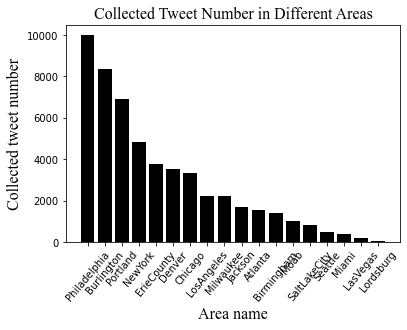

In [65]:
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.bar(tweets_data_groupbyareas_count['area_name'],tweets_data_groupbyareas_count['count'],color='black')
plt.xlabel('Area name',font)
plt.ylabel('Collected tweet number',font)
plt.title('Collected Tweet Number in Different Areas',font)
plt.xticks(rotation=50)
plt.show()

• Percentage of tweets that are (or contain) retweets.

In [66]:
def if_retweets(string):
#     check if the string starts with RT, if it does, then return 1, else return 0
    if string.startswith('RT '):
        return 1
    else:
        return 0

In [67]:
tweets_data['if_retweets']=tweets_data['tweet.full_text'].apply(lambda x:if_retweets(x))

In [68]:
tweets_data_groupbyareas_1=tweets_data[['area_name','if_retweets']].groupby("area_name").sum(['if_retweets']).reset_index()
tweets_data_groupbyareas_2=tweets_data[['area_name','if_retweets']].groupby("area_name").count().reset_index()
tweets_data_groupbyareas_2.columns=['area_name','total_number']
tweets_data_groupbyareas=pd.merge(tweets_data_groupbyareas_1,tweets_data_groupbyareas_2,how='left',on=["area_name"],right_index=False)

In [69]:
tweets_data_groupbyareas['retweet_percentage']=tweets_data_groupbyareas['if_retweets']/tweets_data_groupbyareas['total_number']
tweets_data_groupbyareas=tweets_data_groupbyareas.sort_values(by='retweet_percentage', ascending=False)
tweets_data_groupbyareas

,area_name,if_retweets,total_number,retweet_percentage
16,SaltLakeCity,686,820,0.836585
12,Moab,734,1039,0.706449
15,Portland,4479,6913,0.647910
5,ErieCounty,2415,3761,0.642116
13,NewYork,3021,4838,0.624432
2,Burlington,5208,8365,0.622594
4,Denver,2133,3511,0.607519
14,Philadelphia,5679,10000,0.567900
9,LosAngeles,1132,2227,0.508307
17,Seattle,256,510,0.501961


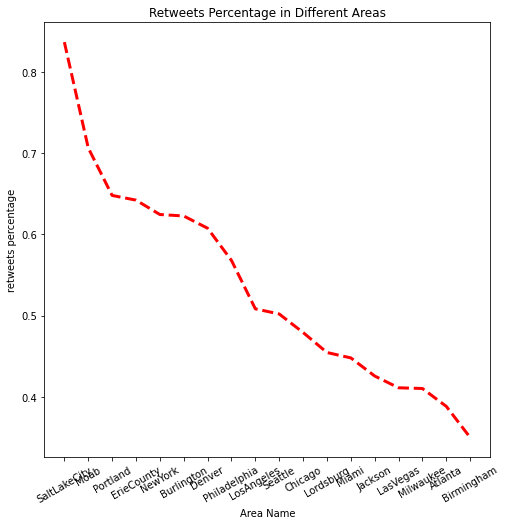

In [70]:
plt.figure(figsize=(8,8))
plt.plot(tweets_data_groupbyareas['area_name'],tweets_data_groupbyareas['retweet_percentage'],'r--',linewidth=3)
plt.xlabel('Area Name')
plt.ylabel('retweets percentage')
plt.title('Retweets Percentage in Different Areas')
plt.xticks(rotation=30)
plt.show()


• Percentage of collected tweets that are English.

In [71]:
print('The total percentage of the collected English Tweets is: {:.2%}'.format(tweets_data['tweet.lang'].value_counts()['en']/tweets_data['tweet.lang'].value_counts().sum()))

The total percentage of the collected English Tweets is: 89.03%


• Percentage of tweets that contain URLs

In [72]:
def if_URL(string):
    # findall() has been used 
    # with valid conditions for urls in string
    # return 1 if there is a URL in the string, else return 0
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)      
    if(len(url)>0):
        return 1
    else:
        return 0

In [73]:
tweets_data['tweets_text_urls']=tweets_data['tweet.full_text'].apply(lambda x:if_URL(x))
print("Percentage of tweets that contain URLs is: {:.2%}".format(tweets_data['tweets_text_urls'].sum()/len(tweets_data['tweets_text_urls']),"%"))

Percentage of tweets that contain URLs is: 38.38%


• Table of the 30 most frequent hashtags in the following format: [rank, hashtag, frequency]. Example: [1, #coronavirus, 2500]

In [74]:
def find_hashtag(string):
#     input a string and output a array of hashtag
    return re.findall(r"#(\w+)", string)

In [75]:
tweets_data['hashtag_array']=tweets_data['tweet.full_text'].apply(lambda x:find_hashtag(x))

In [76]:
sorted_hashtags=[(l,k) for k,l in sorted([(j,i) for i,j in Counter(tweets_data['hashtag_array'].sum()).items()], reverse=True)]

In [77]:
for x,i in zip(sorted_hashtags[:30],range(30)):
#     print('[',i+1,', #',x[0],',',x[0],']')
    print('[{}, #{}, {}]'.format(i+1,x[0],x[1]))

[1, #COVID19, 8737]
[2, #GetVaccinated, 6906]
[3, #vaccine, 5872]
[4, #vaccinated, 4973]
[5, #CovidVaccine, 4448]
[6, #Vaccine, 3476]
[7, #vaccination, 2452]
[8, #Pfizer, 2119]
[9, #COVID19Vaccine, 1925]
[10, #COVID, 1561]
[11, #Moderna, 1286]
[12, #AstraZeneca, 1194]
[13, #coronavirus, 972]
[14, #IndianArmy, 800]
[15, #Vaccination, 799]
[16, #StaySafe, 764]
[17, #COVIDVaccine, 761]
[18, #covid, 739]
[19, #WearAMask, 732]
[20, #COVID19vaccine, 689]
[21, #Kashmir, 650]
[22, #covid19, 639]
[23, #Awaam, 582]
[24, #PfizerVaccine, 572]
[25, #VaccinesWork, 534]
[26, #vaccines, 527]
[27, #pandemic, 524]
[28, #Covid19, 485]
[29, #covidvaccine, 478]
[30, #Biden, 461]


### Data preprocessing

• Filter languages other than English

In [78]:
pre_tweets_data_1=tweets_data[tweets_data['tweet.lang']=='en']

In [79]:
pre_tweets_data_1.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,area_name,if_retweets,tweets_text_urls,hashtag_array
1,I actually saw a woman wearing this shirt yest...,2021-06-06 13:04:14,1401525340195991553,CarianneH,CarianneHixson_,2384288732,"Montclair, NJ",https://t.co/7I5te4MQGT,@cariannehixsonart,False,...,14,2014-03-11 22:45:16,https://pbs.twimg.com/profile_images/100628643...,False,False,en,Portland,0,1,"[science, Pfizer, VaccineRegistration, COVID19..."
2,RT @ESchattner: BUT I'm concerned that #olapar...,2021-06-06 13:03:46,1401525219676852224,Elaine Schattner,ESchattner,95273513,NYC,https://t.co/3LdHzkJO8s,Journalist. Physician. Book on cancer activism...,False,...,773,2009-12-07 20:37:11,https://pbs.twimg.com/profile_images/918579466...,False,False,en,Portland,1,0,[olaparib]
3,"RT @tmprowell: Only 1.4% of US 12-15 yr olds, ...",2021-06-06 13:02:34,1401524918949453826,𝖉𝖆𝖛𝖊 𝖋𝖚𝖑𝖑𝖊𝖗,cd_fuller,931068577,HOU,https://t.co/vmzivwZfPG,"Rad onc, informatician, imaging researcher, Sp...",False,...,489,2012-11-07 02:45:53,https://pbs.twimg.com/profile_images/941049282...,False,False,en,Portland,1,0,"[COVID19, v]"
4,Exciting news! We're giving out cool #NYCVaxCh...,2021-06-06 13:01:00,1401524525251055619,NYC Health + Hospitals/Bellevue,BellevueHosp,2962245395,NYC,https://t.co/jvDmLVp31c,NYC Health+Hospitals/Bellevue. Keeping communi...,True,...,132,2015-01-05 15:52:29,https://pbs.twimg.com/profile_images/128123803...,False,False,en,Portland,0,1,"[NYCVaxChamp, COVID19vaccine]"
6,"RT @tmprowell: Only 1.4% of US 12-15 yr olds, ...",2021-06-06 12:56:57,1401523504336486401,"Sarah Bernstein, MD, MHA, FAAP",sbernsteinmd,3303457302,"Durham, NC",https://t.co/ybBF5I2C4u,"NICU fellow @DukeHealth. MD from Emory, MHA Co...",True,...,304,2015-08-01 16:19:09,https://pbs.twimg.com/profile_images/123248749...,True,False,en,Portland,1,0,"[COVID19, v]"


• data preprocess:  
    1) Set the tweet to lowercase  
    2) Filter URL links  
    3) Remove user @ references and '#' from tweet  
    4) Filter emoticons  
    5) Filter punctuation  
    6) Remove stopwords  

In [80]:
def preprocess_tweet_text(tweet):
#     set the tweet to lowercase
    tweet=tweet.lower()
#     Filter URL links
    tweet=re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
# Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
# Filter emoticons
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    tweet=re.sub(emoj, '', tweet)    
#     Remove non-alphabetic characters 
    tweet =re.sub("[^a-zA-Z]+", " ", tweet)
#     Break sentences into words.
    tweet=tweet.split()
# Lemmatization: converting a word to its base form
    lemmatizer = WordNetLemmatizer()
    tweet=[lemmatizer.lemmatize(word) for word in tweet]
# Remove common English words
    tweet=[word for word in tweet if not word in stop_words]
#   Remove short words (length strictly less than 3 characters)
    tweet=[word for word in tweet if len(word) > 2]
    
    return " ".join(tweet)
#     return tweet

In [81]:
pre_tweets_data_1['tweet.full_text']=pre_tweets_data_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text(x))

<ipython-input-81-8c8891e6fe13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_tweets_data_1['tweet.full_text']=pre_tweets_data_1['tweet.full_text'].apply(lambda x:preprocess_tweet_text(x))


In [82]:
pre_tweets_data_1.head()

,tweet.full_text,tweet.created_at,tweet.id_str,tweet.user.name,tweet.user.screen_name,tweet.user.id_str,tweet.user.location,tweet.user.url,tweet.user.description,tweet.user.verified,...,tweet.user.listed_count,tweet.user.created_at,tweet.user.profile_image_url_https,tweet.user.default_profile,tweet.user.default_profile_image,tweet.lang,area_name,if_retweets,tweets_text_urls,hashtag_array
1,actually saw woman wearing shirt yesterday lib...,2021-06-06 13:04:14,1401525340195991553,CarianneH,CarianneHixson_,2384288732,"Montclair, NJ",https://t.co/7I5te4MQGT,@cariannehixsonart,False,...,14,2014-03-11 22:45:16,https://pbs.twimg.com/profile_images/100628643...,False,False,en,Portland,0,1,"[science, Pfizer, VaccineRegistration, COVID19..."
2,concerned olaparib oversold even paper title p...,2021-06-06 13:03:46,1401525219676852224,Elaine Schattner,ESchattner,95273513,NYC,https://t.co/3LdHzkJO8s,Journalist. Physician. Book on cancer activism...,False,...,773,2009-12-07 20:37:11,https://pbs.twimg.com/profile_images/918579466...,False,False,en,Portland,1,0,[olaparib]
3,old old amp old received least one dose covid,2021-06-06 13:02:34,1401524918949453826,𝖉𝖆𝖛𝖊 𝖋𝖚𝖑𝖑𝖊𝖗,cd_fuller,931068577,HOU,https://t.co/vmzivwZfPG,"Rad onc, informatician, imaging researcher, Sp...",False,...,489,2012-11-07 02:45:53,https://pbs.twimg.com/profile_images/941049282...,False,False,en,Portland,1,0,"[COVID19, v]"
4,exciting news giving cool nycvaxchamp gift bag...,2021-06-06 13:01:00,1401524525251055619,NYC Health + Hospitals/Bellevue,BellevueHosp,2962245395,NYC,https://t.co/jvDmLVp31c,NYC Health+Hospitals/Bellevue. Keeping communi...,True,...,132,2015-01-05 15:52:29,https://pbs.twimg.com/profile_images/128123803...,False,False,en,Portland,0,1,"[NYCVaxChamp, COVID19vaccine]"
6,old old amp old received least one dose covid,2021-06-06 12:56:57,1401523504336486401,"Sarah Bernstein, MD, MHA, FAAP",sbernsteinmd,3303457302,"Durham, NC",https://t.co/ybBF5I2C4u,"NICU fellow @DukeHealth. MD from Emory, MHA Co...",True,...,304,2015-08-01 16:19:09,https://pbs.twimg.com/profile_images/123248749...,True,False,en,Portland,1,0,"[COVID19, v]"


### Sentiment Analysis on Twitter

This dataset encoded the target variable with a 3-point ordinal scale: 0 = negative, 2 = neutral, 4 = positive.

Dataset: https://www.dropbox.com/s/du1z2m910a68ehk/training.csv?dl=0

In [83]:
def load_dataset(filename, cols):
    dataset = pd.read_csv(filename, encoding='latin-1')
    dataset.columns = cols
    return dataset

In [84]:
def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [85]:
# implement vectorization using tf-idf
def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

• The target column is comprised of the integer values 0, 2, and 4. To convert the integer results to be easily understood by users, which is Negative, Neutral and positive.

In [86]:
def int_to_string(sentiment):
    if sentiment == 0:
        return "Negative"
    elif sentiment == 2:
        return "Neutral"
    else:
        return "Positive"

In [87]:
# Load dataset
dataset = load_dataset("training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Remove unwanted columns from dataset
dataset = remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
#Preprocess data
dataset.text = dataset['text'].apply(preprocess_tweet_text)

In [88]:
# Split dataset into Train, Test
# Same tf vector will be used for Testing sentiments on unseen trending data
tf_vector = get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X = tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y = np.array(dataset.iloc[:, 0]).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, y_predict_nb))

# Training Logistics Regression model
LR_model = LogisticRegression(solver='lbfgs',max_iter=10000)
LR_model.fit(X_train, y_train)
y_predict_lr = LR_model.predict(X_test)
print(accuracy_score(y_test, y_predict_lr))

0.761440625
0.777440625


#### predict the Tweet sentiment

In [89]:
test_ds = pre_tweets_data_1[['area_name','tweet.full_text']]

# Creating text feature

test_feature = tf_vector.transform(np.array(test_ds.iloc[:, 1]).ravel())

# Using Logistic Regression model for prediction
test_prediction_lr = LR_model.predict(test_feature)

# get the sentiment result to a table
test_result_ds = pd.DataFrame({'area_name': test_ds.area_name, 'prediction':test_prediction_lr})
# convert int to string
test_result_ds['prediction']=test_result_ds['prediction'].apply(lambda x:int_to_string(x))

In [90]:
test_result_ds['count']=1
test_result_ds

,area_name,prediction,count
1,Portland,Positive,1
2,Portland,Negative,1
3,Portland,Positive,1
4,Portland,Positive,1
6,Portland,Positive,1
...,...,...,...
52744,SaltLakeCity,Positive,1
52745,SaltLakeCity,Positive,1
52746,SaltLakeCity,Negative,1
52747,SaltLakeCity,Negative,1


In [91]:
test_result_ds=test_result_ds.groupby(['area_name','prediction']).count().reset_index()
test_result_ds

,area_name,prediction,count
0,Atlanta,Negative,672
1,Atlanta,Positive,619
2,Birmingham,Negative,644
3,Birmingham,Positive,535
4,Burlington,Negative,3070
5,Burlington,Positive,4063
6,Chicago,Negative,1419
7,Chicago,Positive,1573
8,Denver,Negative,1699
9,Denver,Positive,1503


In [92]:
test_result_ds_sum=test_result_ds.groupby('area_name').sum().reset_index()
test_result_ds_sum.columns=['area_name','sum']
test_result_ds_sum

,area_name,sum
0,Atlanta,1291
1,Birmingham,1179
2,Burlington,7133
3,Chicago,2992
4,Denver,3202
5,ErieCounty,3560
6,Jackson,1470
7,LasVegas,157
8,Lordsburg,31
9,LosAngeles,2085


In [93]:
test_result_ds=pd.merge(test_result_ds,test_result_ds_sum,how='left',on=["area_name"],right_index=False)

In [94]:
test_result_ds

,area_name,prediction,count,sum
0,Atlanta,Negative,672,1291
1,Atlanta,Positive,619,1291
2,Birmingham,Negative,644,1179
3,Birmingham,Positive,535,1179
4,Burlington,Negative,3070,7133
5,Burlington,Positive,4063,7133
6,Chicago,Negative,1419,2992
7,Chicago,Positive,1573,2992
8,Denver,Negative,1699,3202
9,Denver,Positive,1503,3202


In [95]:
test_result_ds['rate']=test_result_ds['count']/test_result_ds['sum']

In [96]:
positive_rate=test_result_ds[test_result_ds['prediction']=='Positive'].sort_values(by='rate', ascending=False)

In [97]:
positive_rate

,area_name,prediction,count,sum,rate
33,SaltLakeCity,Positive,605,760,0.796053
25,Moab,Positive,703,950,0.740000
35,Seattle,Positive,293,487,0.601643
19,LosAngeles,Positive,1251,2085,0.600000
17,Lordsburg,Positive,18,31,0.580645
27,NewYork,Positive,2550,4470,0.570470
5,Burlington,Positive,4063,7133,0.569606
31,Portland,Positive,3245,5822,0.557369
29,Philadelphia,Positive,4994,9131,0.546928
15,LasVegas,Positive,83,157,0.528662


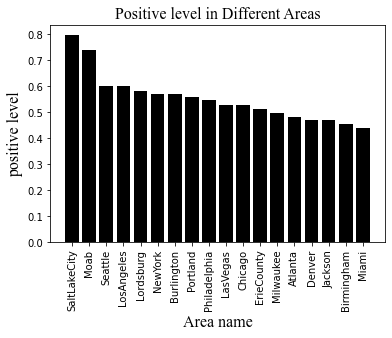

In [98]:
font = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 16,
}
plt.bar(positive_rate['area_name'],positive_rate['rate'],color='black')
plt.xlabel('Area name',font)
plt.ylabel('positive level',font)
plt.title('Positive level in Different Areas',font)
plt.xticks(rotation=90)
plt.show()

We can read from the sentiment analysis result that the highest positive level is Seattle, which is 73%. And we can see that the lowest is Las Vegas, which positive level is only 53.5%. For big cities like Seattle, Los Angeles, Miami, they both have over 60% positive level.

In [99]:
# 结合一下新冠疫情的感染率

In [100]:
positive_rate['area_name']

33    SaltLakeCity
25            Moab
35         Seattle
19      LosAngeles
17       Lordsburg
27         NewYork
5       Burlington
31        Portland
29    Philadelphia
15        LasVegas
7          Chicago
11      ErieCounty
23       Milwaukee
1          Atlanta
9           Denver
13         Jackson
3       Birmingham
21           Miami
Name: area_name, dtype: object

In [101]:
city_info=positive_rate[['area_name','rate']]

In [102]:
# covidactnow.org
city_info['positive_rate']=[0.034,0.096,0.026,0.003,0.011,0.005,0.016,0.011,0.025,0.037,0.019,0.016,0.016,0.023,0.015,0.021,0.055,0.022]

<ipython-input-102-ddaa611b1326>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info['positive_rate']=[0.034,0.096,0.026,0.003,0.011,0.005,0.016,0.011,0.025,0.037,0.019,0.016,0.016,0.023,0.015,0.021,0.055,0.022]


In [103]:
city_info['vaccinated']=[0.494,0.526,0.548,0.552,0.412,0.645,0.553,0.654,0.425,0.419,0.581,0.563,0.46,0.364,0.447,0.431,0.373,0.378]

<ipython-input-103-bbc3004ef8e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  city_info['vaccinated']=[0.494,0.526,0.548,0.552,0.412,0.645,0.553,0.654,0.425,0.419,0.581,0.563,0.46,0.364,0.447,0.431,0.373,0.378]


In [104]:
city_info

,area_name,rate,positive_rate,vaccinated
33,SaltLakeCity,0.796053,0.034,0.494
25,Moab,0.740000,0.096,0.526
35,Seattle,0.601643,0.026,0.548
19,LosAngeles,0.600000,0.003,0.552
17,Lordsburg,0.580645,0.011,0.412
27,NewYork,0.570470,0.005,0.645
5,Burlington,0.569606,0.016,0.553
31,Portland,0.557369,0.011,0.654
29,Philadelphia,0.546928,0.025,0.425
15,LasVegas,0.528662,0.037,0.419


In [105]:
city_info.sort_values(by=['positive_rate'])[:5]['rate'].mean()

0.555575538094531

In [106]:
city_info.sort_values(by=['positive_rate'])[-5:]['rate'].mean()

0.6240264295010975

In [107]:
city_info.sort_values(by=['vaccinated'])[:5]['rate'].mean()

0.4965613631202898

In [108]:
city_info.sort_values(by=['vaccinated'])[-5:]['rate'].mean()

0.546995500759432

In [109]:
city_info.to_csv('city_info.csv',index=False,header=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(6.799999999999997, 0.5, 'rate')

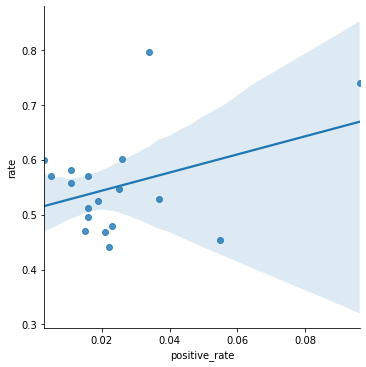

In [110]:
import seaborn as sn
from scipy import stats
senti_positive_rate = city_info[['rate','positive_rate','vaccinated']]
sn.lmplot('positive_rate','rate', data=senti_positive_rate)
plt.xlabel("positive_rate")
plt.ylabel("rate")

In [111]:
print(stats.pearsonr(senti_positive_rate['positive_rate'],senti_positive_rate['rate']))

(0.38017109004565874, 0.11965082269225445)


In [112]:
# There is a small (0.38), and not significant (p > 0.05) positive correlation.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.42499999999999716, 0.5, 'rate')

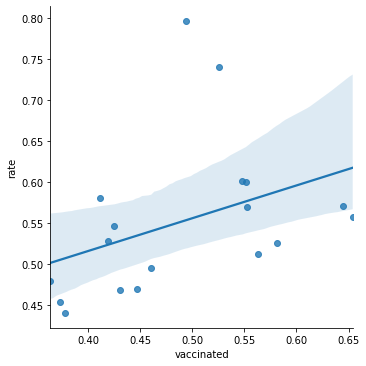

In [113]:
import seaborn as sn
from scipy import stats
senti_positive_rate = city_info[['rate','positive_rate','vaccinated']]
sn.lmplot('vaccinated','rate', data=senti_positive_rate)
plt.xlabel("vaccinated")
plt.ylabel("rate")

In [114]:
print(stats.pearsonr(senti_positive_rate['vaccinated'],senti_positive_rate['rate']))

(0.38885861697945096, 0.11074353640670945)


In [115]:
# There is a small (0.39), and not significant (p > 0.05) positive correlation.